In [28]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import integrate

# 0.3 Termodinámica


In [29]:
r0=[400.,200.]
k=389.6
A= 0.01 
l = 0.30 
cv=3/2*8.314
C=k*A/cv*l
N = 500
t = np.linspace(0.,100.,N)
def f0(T1,T2,C):
    return -C*(T1-T2)

def f1(T1,T2,C):
    return C*(T1-T2)

In [30]:
def GetEuler(f0,f1,r0,t):
    h = (t[-1] - t[0])/(len(t)-1)
    T1 = np.zeros(len(t))
    T2 = np.zeros(len(t))
    T1[0] = r0[0]
    T2[0] = r0[1]
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    for i in range(1,len(t)):
        K1[0] = f0(T1[i-1],T2[i-1],C)
        K1[1] = f1(T1[i-1],T2[i-1],C)
        
        K2[0] = f0(T1[i-1] + h*K1[0],T2[i-1] + h*K1[1],C)
        K2[1] = f1(T1[i-1] + h*K1[0],T2[i-1] + h*K1[1],C)
              
        T1[i] = T1[i-1] + 0.5*h*(K1[0]+K2[0])
        T2[i] = T2[i-1] + 0.5*h*(K1[1]+K2[1]) 
        
    return T1,T2

<IPython.core.display.Javascript object>


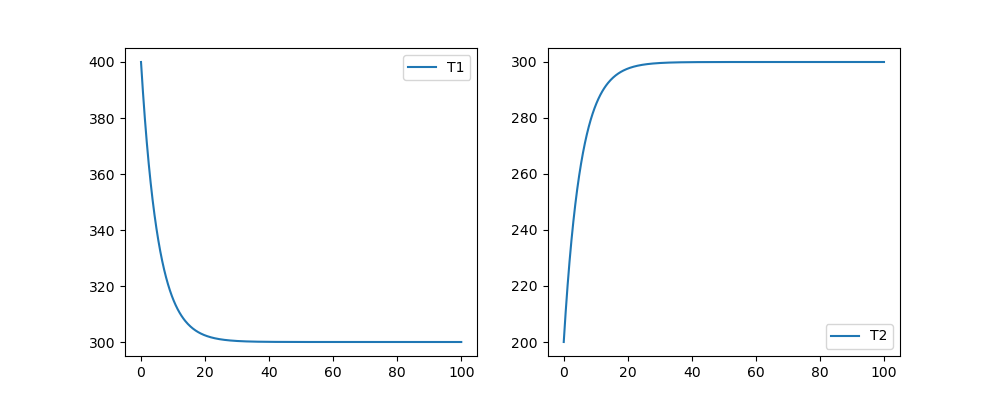

In [31]:
T1,T2 = GetEuler(f0,f1,r0,t)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.plot(t,T1, label='T1')
ax1.plot(t,T2, label='T2')
ax.legend()
ax1.legend()


# Cython

In [32]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/lbastidash/LuisBastidas-JenniferMartelo/main/Semana%203/MisDatos.txt",sep=' ',names=["a","b"])
data=data.to_numpy()
data

array([[-2.00000e+001,  9.41642e-173],
       [-1.99900e+001,  1.40377e-172],
       [-1.99800e+001,  2.09228e-172],
       ...,
       [ 1.99800e+001, -1.40377e-172],
       [ 1.99900e+001, -9.41642e-173],
       [ 2.00000e+001, -6.31521e-173]])

<IPython.core.display.Javascript object>


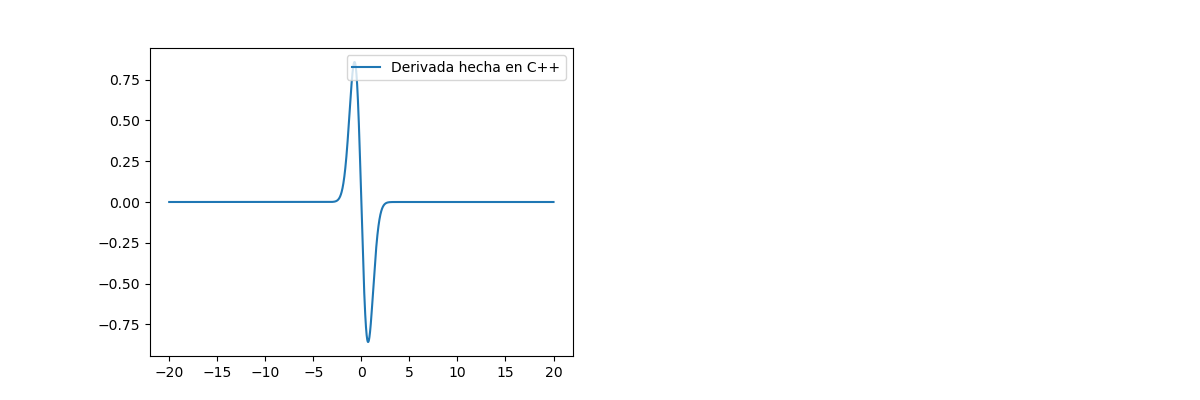

In [33]:
x= data[:,0]   
df= data[:,1] 
fig = plt.figure(figsize=(12,4))
ax2 = fig.add_subplot(121)
ax2.plot(x,df, label='Derivada hecha en C++')
ax2.legend()